In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [30]:
def split_value_diff(df):
    df.xG = df.xG.apply(lambda x: float(re.split("[+ | -]", x)[0]))
    df.xGA = df.xGA.apply(lambda x: float(re.split("[+ | -]", x)[0]))
    df.xPTS = df.xPTS.apply(lambda x: float(re.split("[+ | -]", x)[0]))
    df["xg_g_diff"] = df.xG - df.G
    df["xga_ga_diff"] = df.xGA - df.GA
    df["xpts_pts_diff"] = df.xPTS - df.PTS

In [44]:
# разделение xg и разницы между ожидаемым значением и реальным
for year in "45678":
    path = f"xg_data/201{year}.csv"
    df = pd.read_csv(path)
    split_value_diff(df)
    df.to_csv(path, index=None)

In [47]:
# данные взяты с сайта understat.com 

xg_table_2014 = pd.read_csv("xg_data/2014.csv")
xg_table_2015 = pd.read_csv("xg_data/2015.csv")
xg_table_2016 = pd.read_csv("xg_data/2016.csv")
xg_table_2017 = pd.read_csv("xg_data/2017.csv")
xg_table_2018 = pd.read_csv("xg_data/2018.csv")

In [151]:
# http://www.football-data.co.uk/englandm.php
table_2014 = pd.read_csv("data/14-15.csv")
table_2015 = pd.read_csv("data/15-16.csv")
table_2016 = pd.read_csv("data/16-17.csv")
table_2017 = pd.read_csv("data/17-18.csv")
table_2018 = pd.read_csv("data/18-19.csv")

In [72]:
table_2018.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [179]:
def plot_home_away_win(df, season):
    COLOR = "white"
    plt.figure(figsize=[30, 20])
    plt.rcParams['text.color'] = COLOR
    plt.rcParams['legend.facecolor'] = "black"
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['xtick.labelsize'] = 40
    
    newdf = df.join(pd.get_dummies(df.FTR))
    
    HomeTeamWin = newdf.groupby("HomeTeam").H.mean()
    AwayTeamWin = newdf.groupby("AwayTeam").A.mean()
    
    TeamWin = pd.DataFrame()
    TeamWin["Team"] = HomeTeamWin.index
    TeamWin["HomeWin"] = HomeTeamWin.values
    TeamWin["AwayWin"] = AwayTeamWin.values
    
    width = 0.4
    x = np.arange(20)
    plt.bar(x, TeamWin.HomeWin, width, label="Home win %")
    plt.bar(x + width-0.1, TeamWin.AwayWin, width, label="Away win %")
    plt.xticks(x + width / 2, (TeamWin["Team"]), rotation="vertical")
    plt.legend(prop = {"size": 25})
    plt.title(f"Win percentage for each club (Home & Away) {season}-{season+1}", fontsize=40)

In [165]:
%matplotlib inline

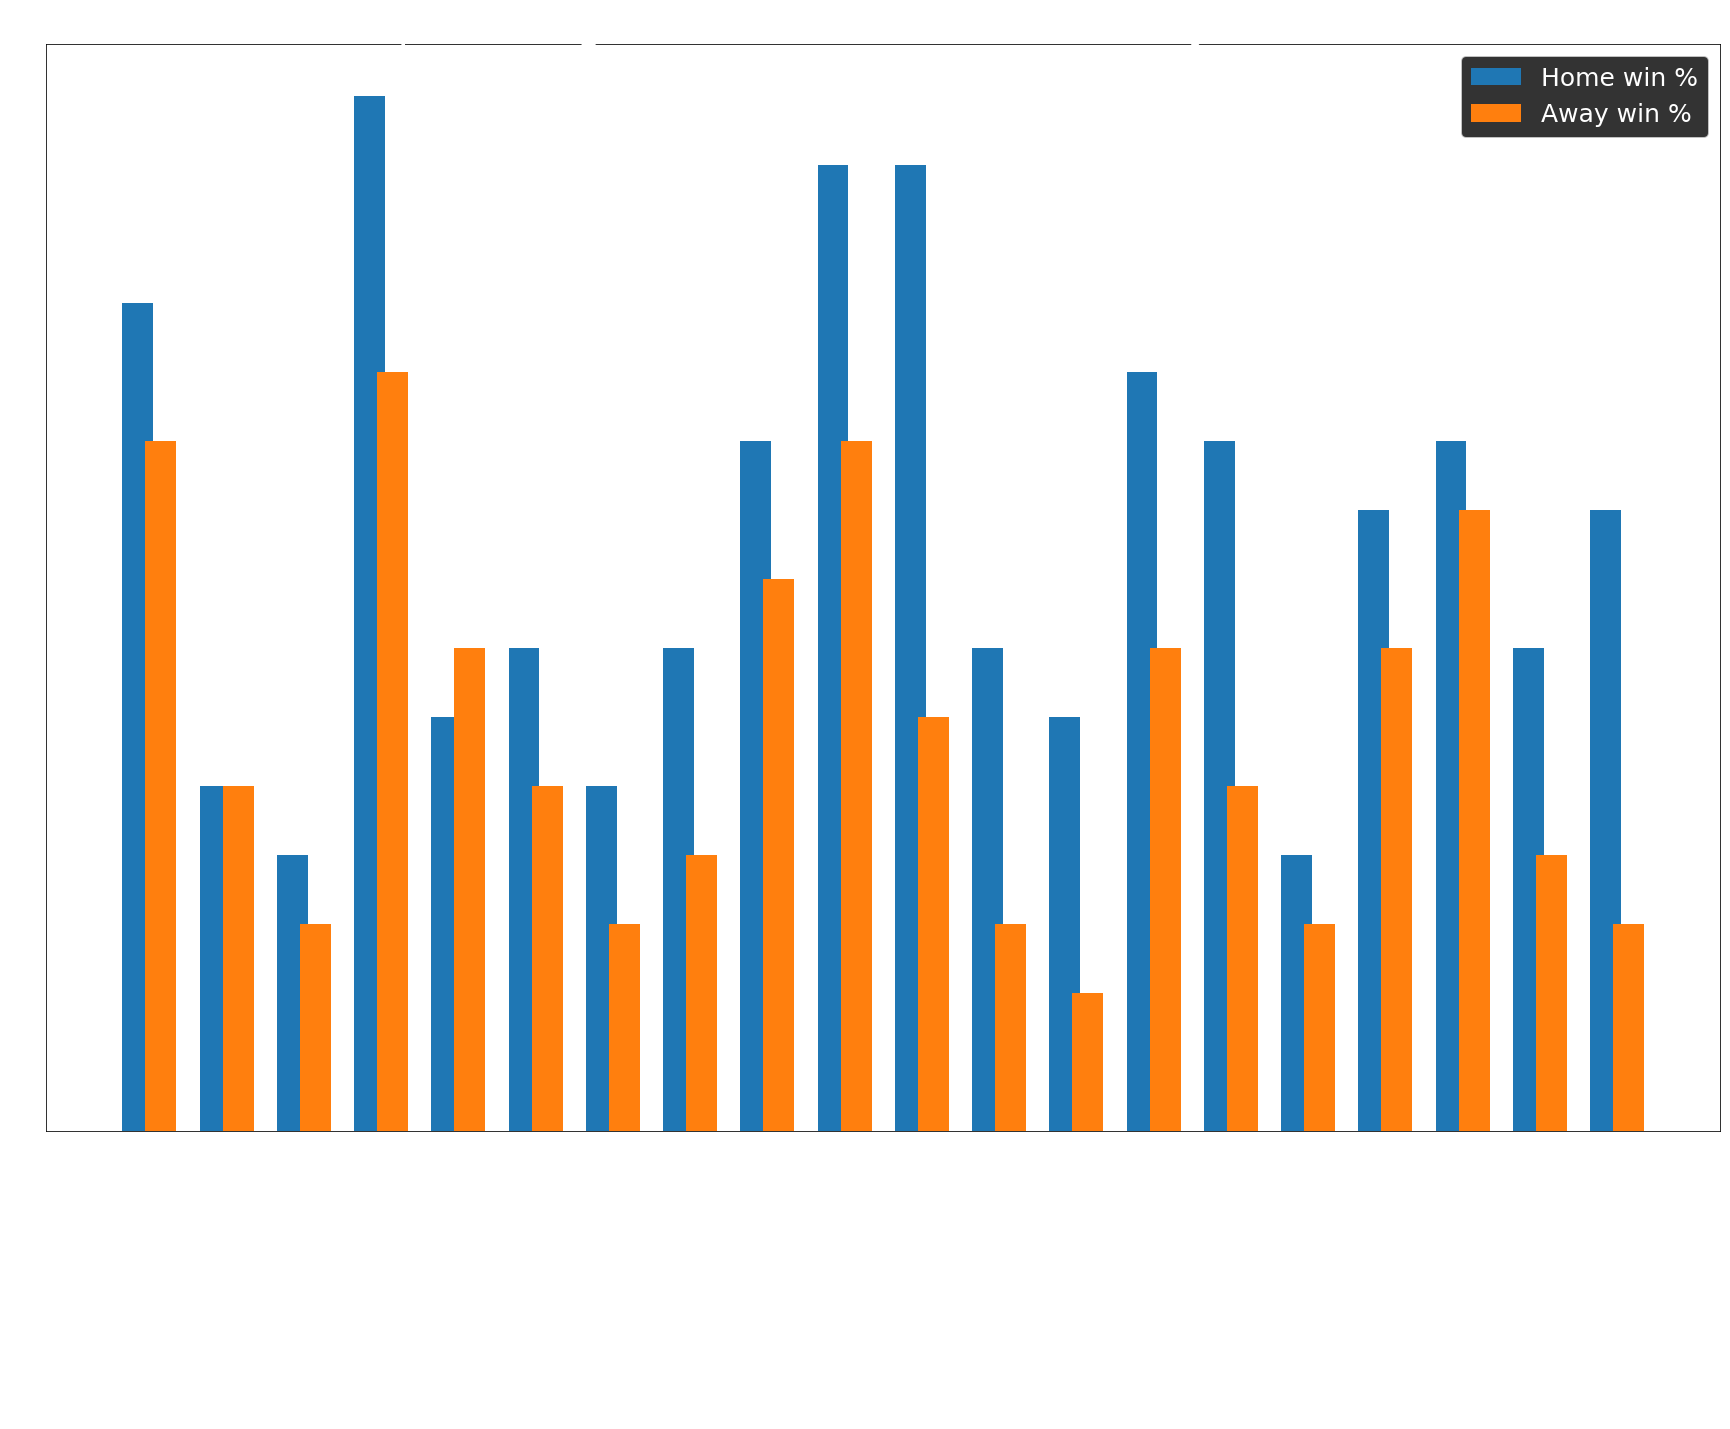

In [180]:
plot_home_away_win(table_2014, 2014)

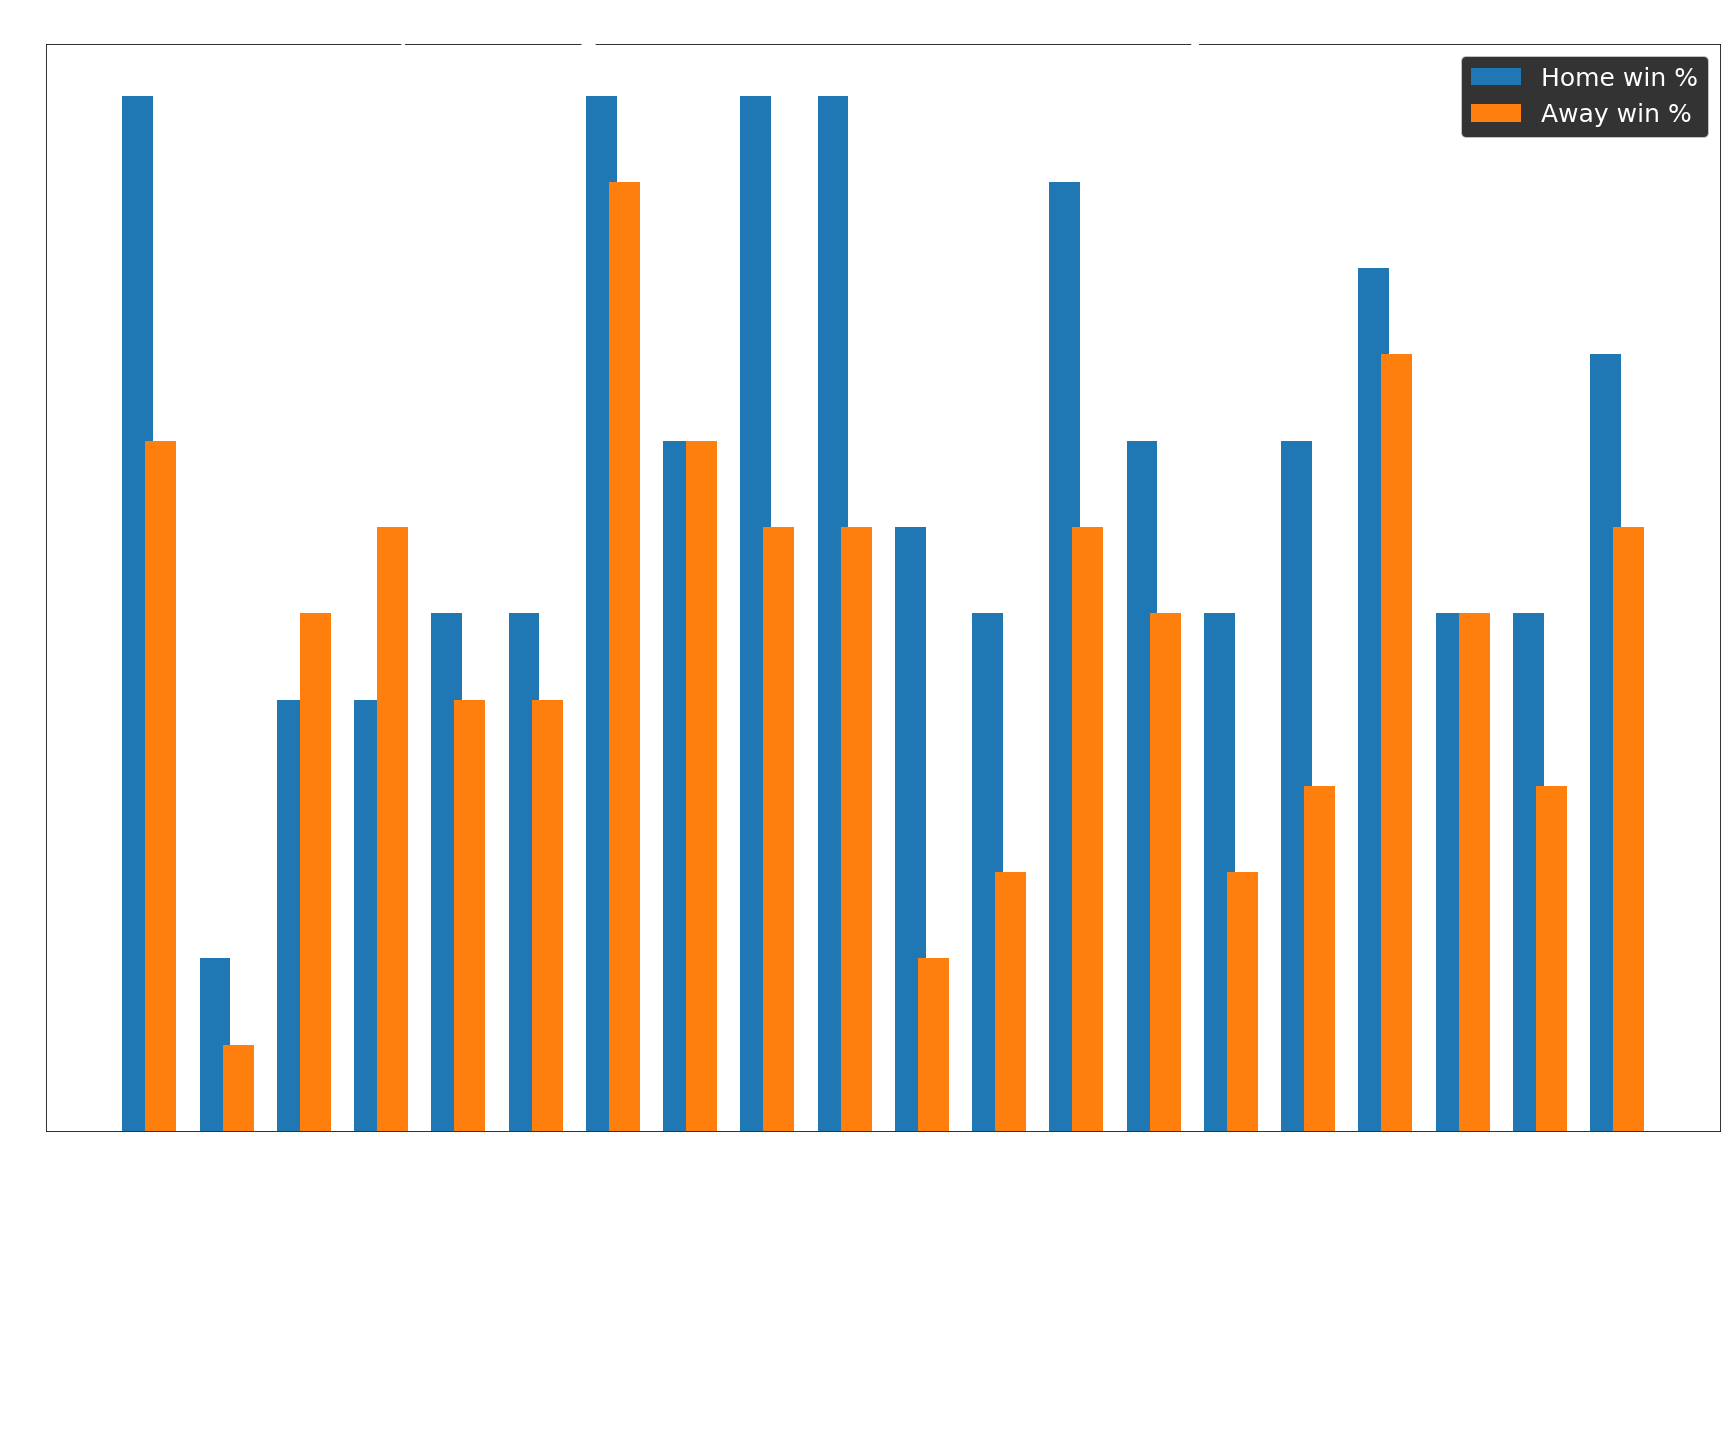

In [181]:
plot_home_away_win(table_2015, 2015)

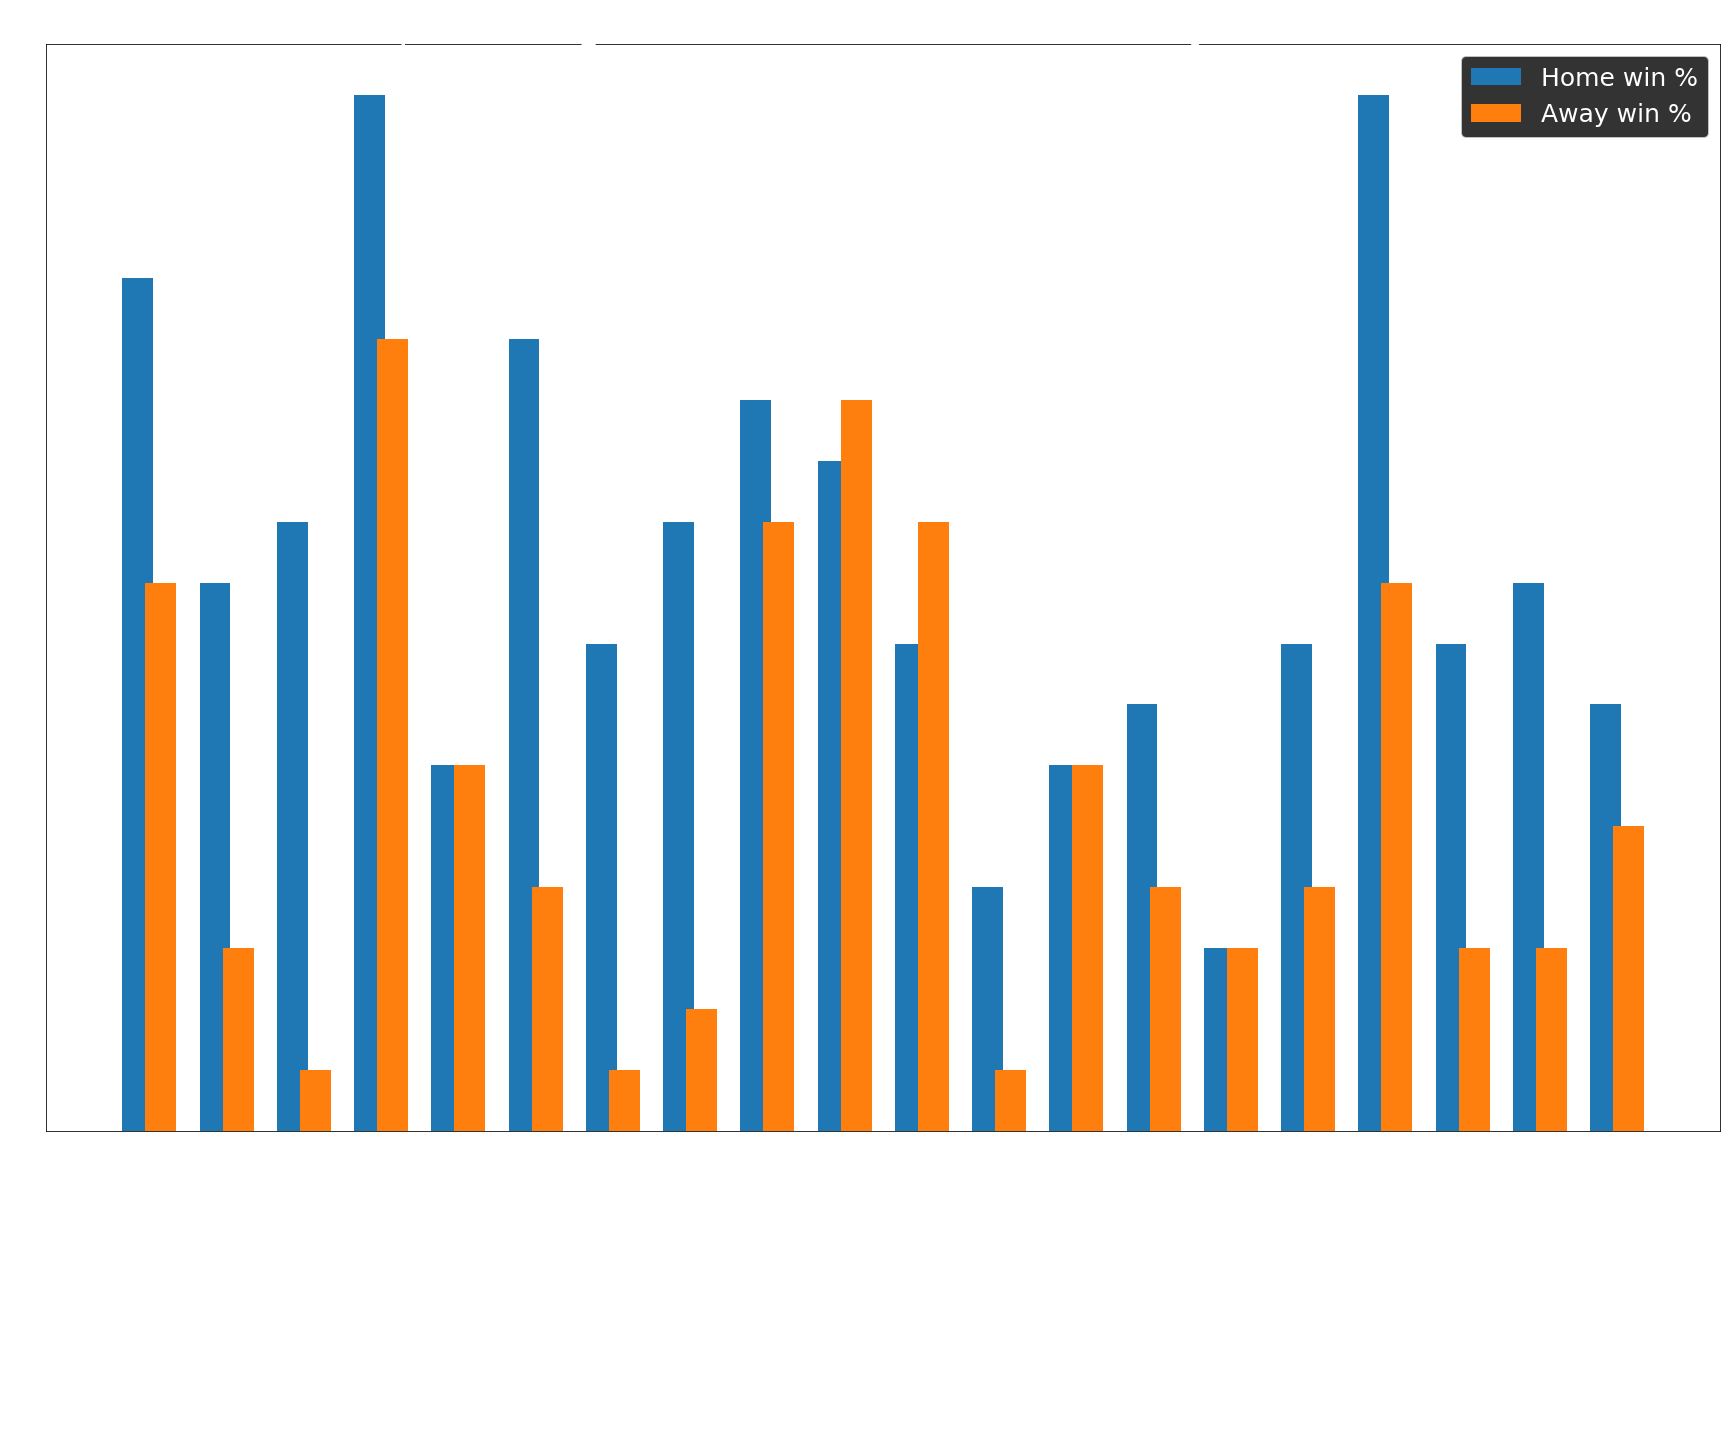

In [182]:
plot_home_away_win(table_2016, 2016)

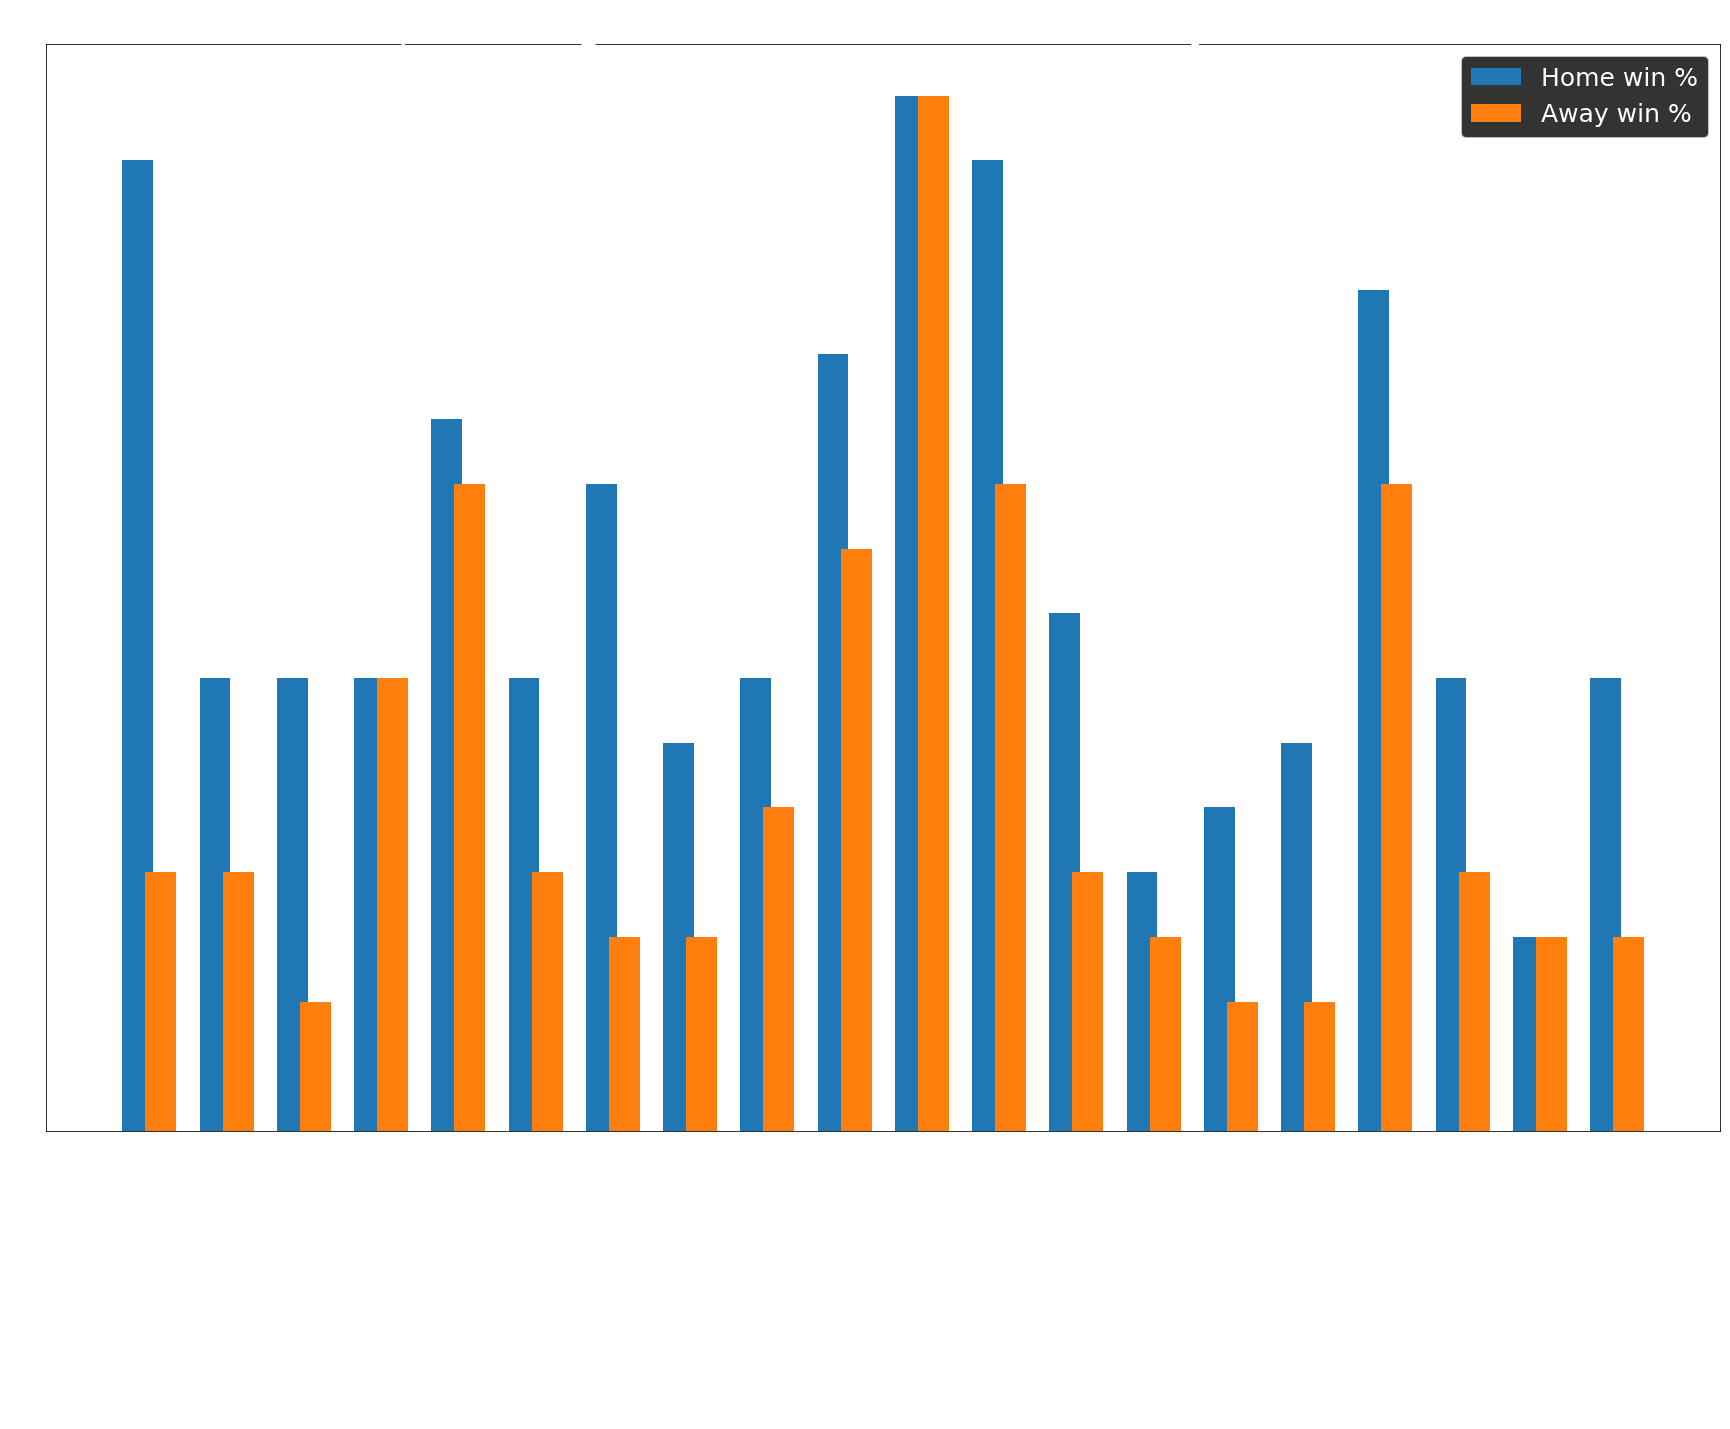

In [183]:
plot_home_away_win(table_2017, 2017)

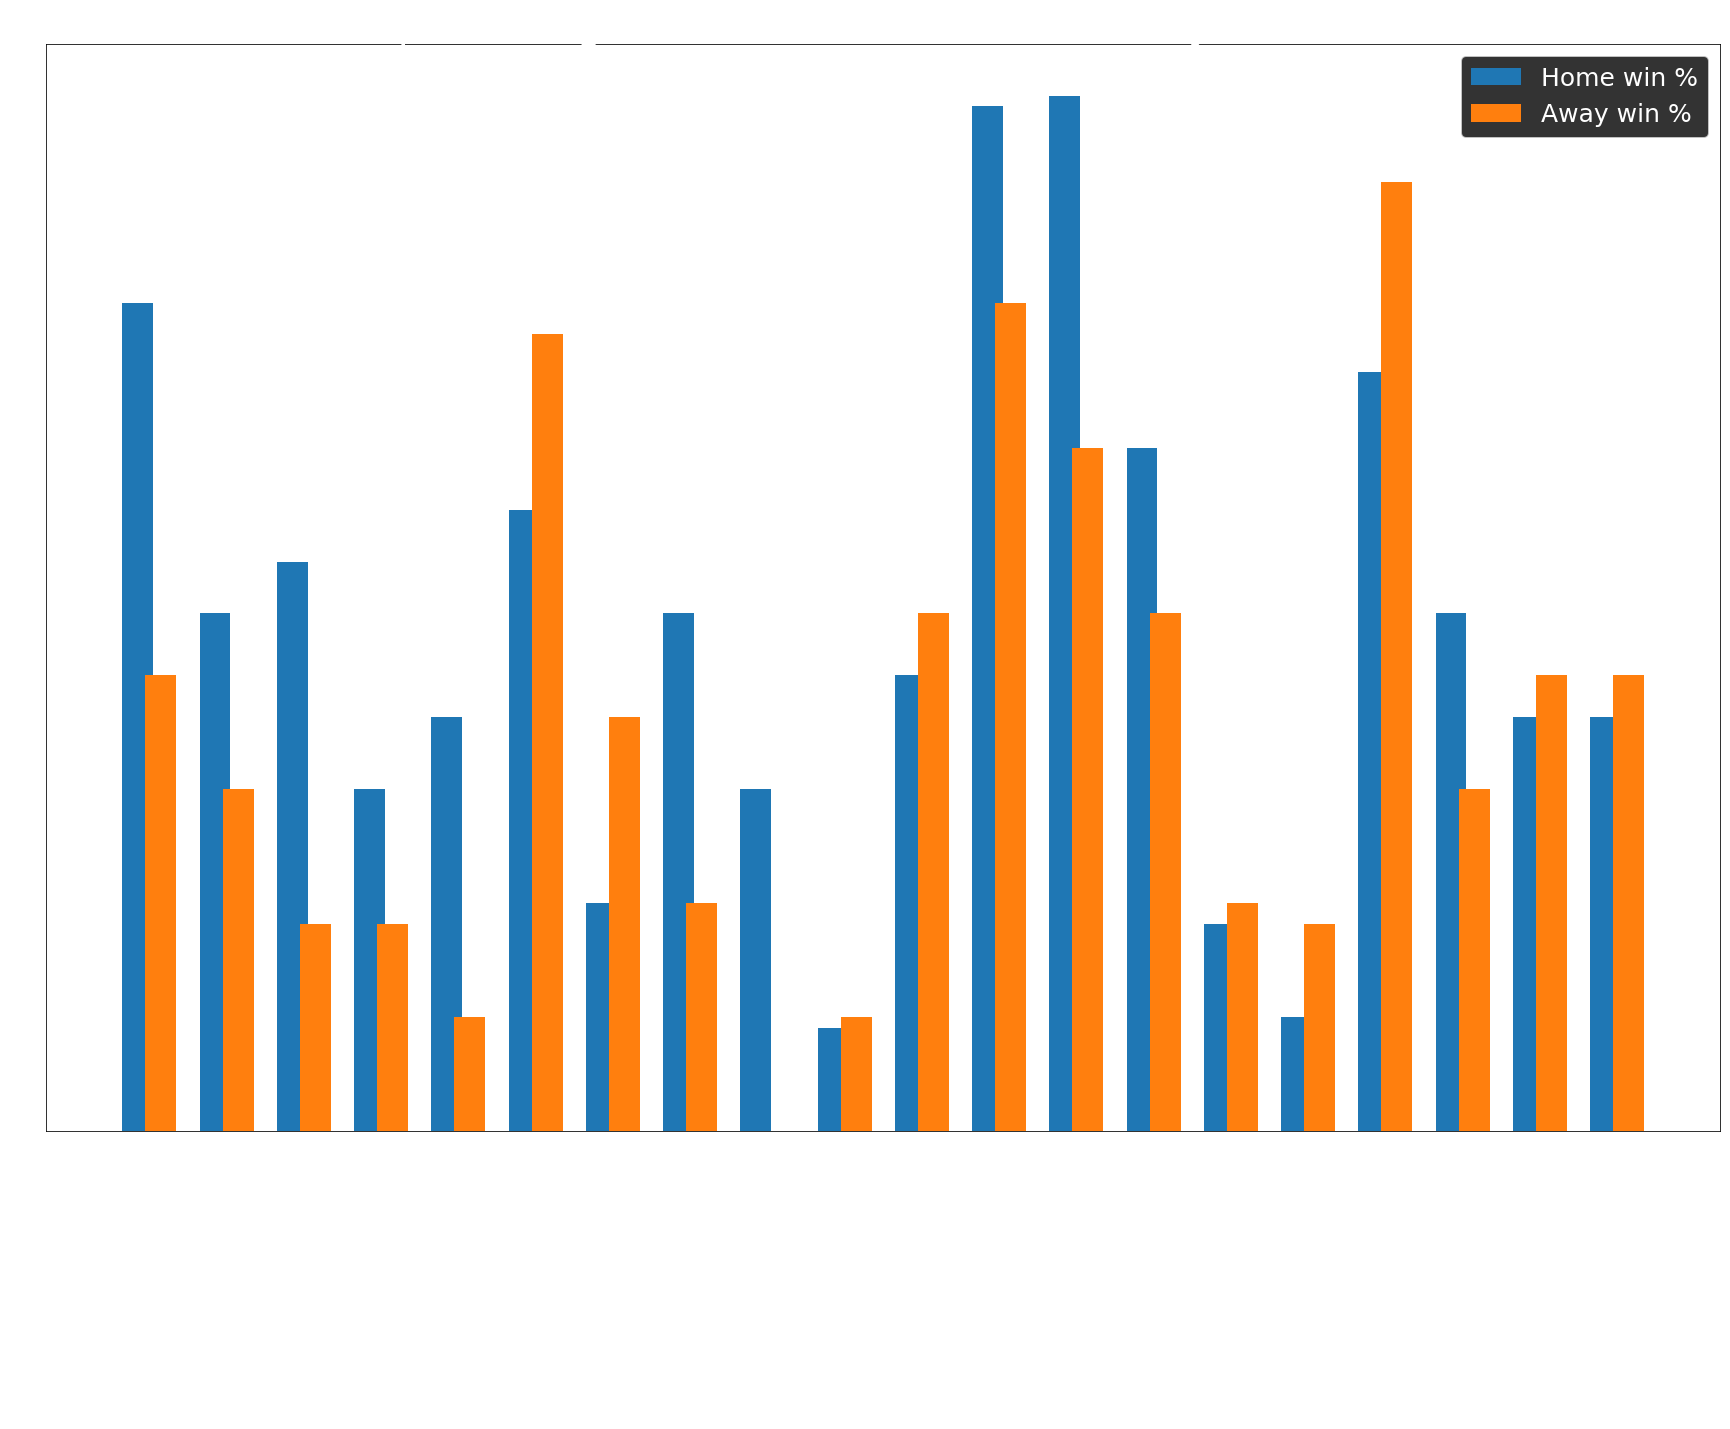

In [184]:
plot_home_away_win(table_2018, 2018)

In [178]:
xg_table_2017.head(6)

,№,Team,M,W,D,L,G,GA,PTS,xG,...,NPxGA,NPxGD,PPDA,OPPDA,DC,ODC,xPTS,xg_g_diff,xga_ga_diff,xpts_pts_diff
0,1,Manchester City,38,32,4,2,106,27,100,91.43,...,22.99,62.13,6.40,23.28,541,96,91.09,-14.57,-2.49,-8.91
1,2,Manchester United,38,25,6,7,68,28,81,59.04,...,42.78,13.85,10.25,13.15,319,243,62.33,-8.96,15.54,-18.67
2,3,Tottenham,38,23,8,7,74,36,77,68.91,...,33.48,33.15,7.58,14.35,339,162,76.02,-5.09,-0.14,-0.98
3,4,Liverpool,38,21,12,5,84,38,75,77.49,...,31.18,44.00,9.55,19.49,436,148,79.38,-6.51,-2.25,4.38
4,5,Chelsea,38,21,7,10,62,38,70,59.16,...,32.51,24.36,12.31,12.56,373,220,68.46,-2.84,-3.97,-1.54
5,6,Arsenal,38,19,6,13,74,51,63,72.27,...,44.18,24.29,9.13,15.64,488,203,65.90,-1.73,-2.25,2.90
